**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [2]:
#install packages 
import math
import sympy as sp
from sympy import lambdify,symbols, ln, solve, sqrt
import scipy.optimize as opt
import numpy as np
import pandas as pd
from types import SimpleNamespace
import matplotlib.pyplot as plt
from matplotlib import cm #used for 3d plots
from scipy import optimize 
from scipy.optimize import minimize
import random
%load_ext autoreload
%autoreload 2

%matplotlib inline

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [3]:
# 1 Define symbols
w, L,  tau, alpha, kappa, nu, G = symbols('w L tau alpha kappa nu G')
tilde_w = symbols(r'\tilde{w}')

# 2 Define tilde_w and private consumption function C

C = kappa + (1 - tau) * w * L

# 3 Define the utility function V
V = ln(C**alpha * G**(1 - alpha)) - nu * L**2 / 2

# 4 Compute the derivative of V with respect to L
dVdL = V.diff(L)

# 5 Substitute the relationship between tilde_w and C into dVdL
dVdL_substituted = dVdL.subs({C: kappa + (1 - tau) * w * L, w: tilde_w / (1 - tau)})

# 6 Solve the equation dVdL_substituted = 0 for L
optimal_L_expr = solve(dVdL_substituted, L)
optimal_L = optimal_L_expr[0]

# 7 Print the result
optimal_L


(-kappa*nu - sqrt(nu*(4*\tilde{w}**2*alpha + kappa**2*nu)))/(2*\tilde{w}*nu)

After simplification, it is the same as the formula required to prove which is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$,the optimal labour supply is indepent with government consumption acrroding to the optimal labor supply choice function.

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In [4]:
# 1 set the parameter 
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
tau = 0.3
G_values = [1.0, 2.0]

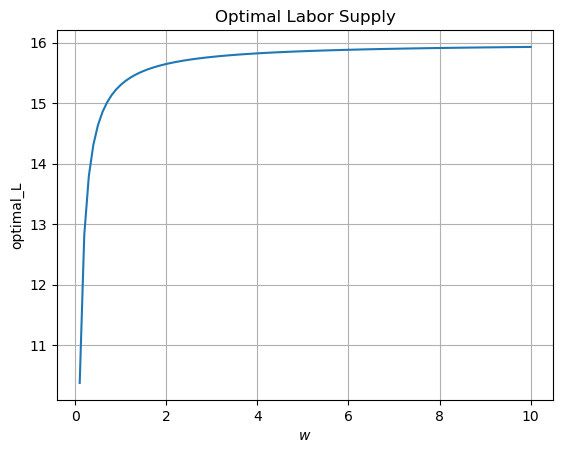

In [5]:
# 2 Define the symbol and expression for w
tilde_w = (1 - tau) * w

# 3 Define the expression for optimal_L rather than unsimplfied optimal_L
optimal_L_expr = (-kappa + sqrt(kappa**2 + 4 * alpha * tilde_w**2 / nu)) / (2 * tilde_w)

# 4 Lambdify the expression for optimal_L
optimal_L_func = lambdify(w, optimal_L_expr)

# 5 Define the range of w values
w_values = np.linspace(0.1, 10, 100)  # Adjust the range as needed

# 6 Compute the corresponding optimal_L values
L_star_values = [optimal_L_func(w_val) for w_val in w_values]

# 7 Plot the relationship between w and L_star
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(w_values, L_star_values)
ax.set_title('Optimal Labor Supply')
ax.set_xlabel('$w$')
ax.set_ylabel('optimal_L')
ax.grid(True)



We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


$\tau \in (0,1)$ is the labor-income tax rate. So we build the function of optimal labor supply, government consumption and worker ulility function: $L_C$, $G_C$ and $V_C$, and then plot how they change acrroding different value of $\tau \in (0,1)$.


In [6]:
# 1 set gover_consumption depend on tau value
def gover_consumption(tau_g,w=1):
    L_C = (-kappa + sqrt(kappa**2 + 4 * alpha * ((1 - tau_g) * w)**2 / nu)) / (2 * ((1 - tau_g) * w))
    G_C = tau_g * w * L_C
    V_C = ln((kappa + (1 - tau_g) * w * L_C**alpha * G_C)**(1 - alpha)) - nu * L_C**2 / 2
    return L_C,G_C,V_C

Text(0.5, 1.0, 'Government Consumption')

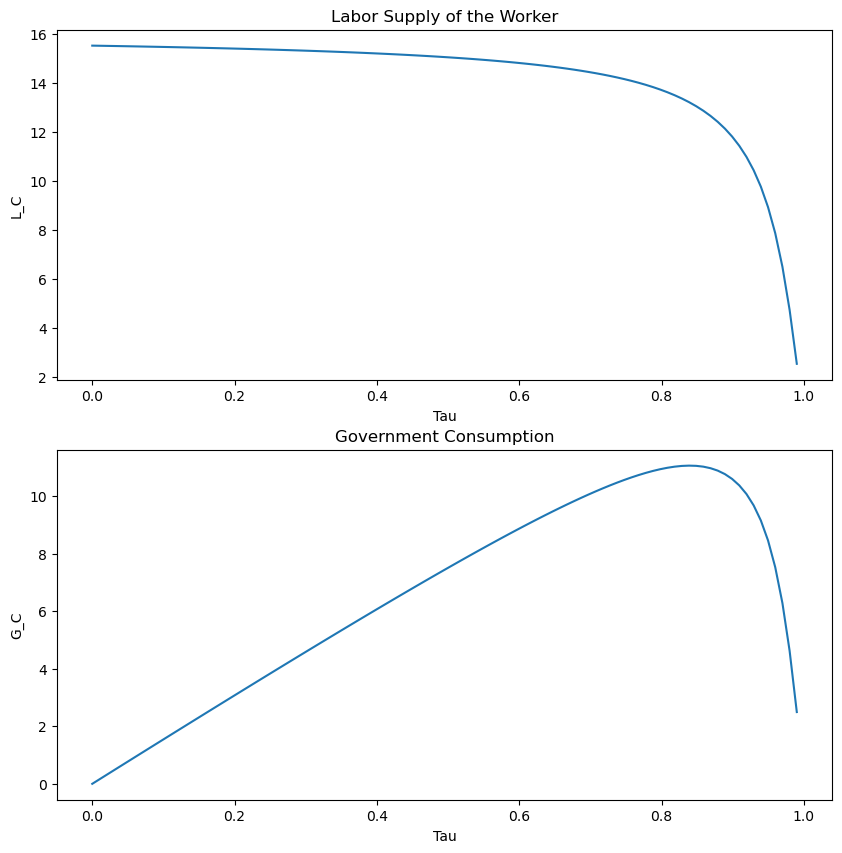

In [ ]:
# 2 Define the range of tau values
tau_values = np.linspace(0, 1, 100)  # Adjust the number of points as desired

# 3 Initialize arrays to store the calculated values
L_C_values = np.zeros_like(tau_values)
G_C_values = np.zeros_like(tau_values)
V_C_values = np.zeros_like(tau_values)


# 4 Calculate the values for each tau
for i, tau in enumerate(tau_values):
    L_C, G_C, V_C = gover_consumption(tau,w=1)
    L_C_values[i] = L_C
    G_C_values[i] = G_C
    V_C_values[i] = V_C
    

# 5 Plot the results
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(2, 1, 1)
ax.plot(tau_values, L_C_values)
ax.set_xlabel('Tau')
ax.set_ylabel('L_C')
ax.set_title('Labor Supply of the Worker')

ax = plt.subplot(2, 1, 2)
ax.plot(tau_values, G_C_values)
ax.set_xlabel('Tau')
ax.set_ylabel('G_C')
ax.set_title('Government Consumption')

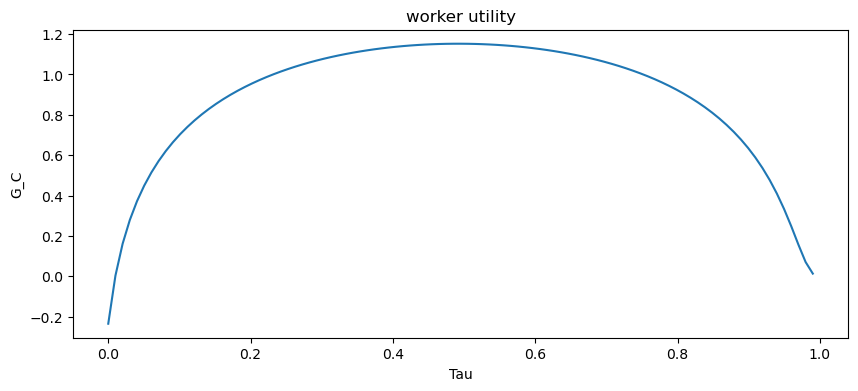

In [ ]:
# 5 Plot the result for worker utility 
plt.figure(figsize=(10, 4))
plt.subplot(1, 1, 1)
plt.plot(tau_values, V_C_values)
plt.xlabel('Tau')
plt.ylabel('G_C')
plt.title('worker utility')


plt.show()

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

From the answers of Question 3, we can guess the $\tau$ value maximizing worker utility is near 0.5.

In [ ]:
# 1 set the function of worker utility
def objective_function(tau_g):
    L_C, G_C, V_C = gover_consumption(float(tau_g), w=1)
    return -V_C


In [ ]:
# 2 Perform the optimization
result = minimize(objective_function, x0=[0.5], method='Nelder-Mead', bounds=[(0, 1)])

# 3 Extract the maximum V_C and corresponding tau_g
max_V_C = -result.fun
optimal_tau_g = result.x[0]

# 4 Print the maximum V_C and corresponding tau_g
print("Maximum V_C:", max_V_C)
print("Optimal tau_g:", optimal_tau_g)

Maximum V_C: 1.152136460635155
Optimal tau_g: 0.4916015625


The result of $\tau$ value maximizing worker utility is 0.4916015625 near 0.5, it verify our guess. But under this value, the government consumption has not reach the maximazition according to  Question 3. For the socially optimal tax rate, the government should refrain from raising taxes. This means that the optimal tax rate that maximises worker utility may contradict the tax rate that maximises government consumption when government consumption is taken into account.

Maximising worker utility may imply setting a tax rate that allows workers to retain a larger proportion of their income, thereby maximising their satisfaction and well-being. On the other hand, maximising government consumption may require a higher tax rate in order to obtain more tax revenue for public expenditure, investment in public goods and services.

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

We first find the relationship between L and G by using the first-order derivative of the function $V(w,\tau,G)$ to be 0. Then use $G = \tau w L^{\star}((1-\tau)w,G)$ to get G.

In [ ]:
# 1 find the optimal labor supply function (method 1)
import sympy as sp
w, L,  tau, alpha, kappa, nu, G = symbols('w L tau alpha kappa nu G')
rho, epsilon, sigma = sp.symbols('rho epsilon sigma')
tilde_w = symbols(r'\tilde{w}')

C = kappa + (1 - tau) * w * L
V = (((alpha * C**((sigma - 1) / sigma) + (1 - alpha) * G**((sigma - 1) / sigma))**(sigma / (sigma-1)))**(1 - rho) - 1) / (1 - rho) - nu * L**(1 + epsilon) / (1 + epsilon)

dV_dL = sp.diff(V, L)

equation = dV_dL.subs(C, kappa + (1 - tau) * w * L)
simplified_equation = sp.simplify(equation)

optimal_L_new = sp.solve(simplified_equation, L)
optimal_L_new_func = optimal_L_new[0].subs(w, tilde_w / (1 - tau))

NotImplementedError: multiple generators [((-G*alpha/G**(1/sigma) + G/G**(1/sigma) - L*alpha*tau*w/(-L*tau*w + L*w + kappa)**(1/sigma) + L*alpha*w/(-L*tau*w + L*w + kappa)**(1/sigma) + alpha*kappa/(-L*tau*w + L*w + kappa)**(1/sigma))**(sigma/(sigma - 1)))**(-rho), (-G*alpha/G**(1/sigma) + G/G**(1/sigma) - L*alpha*tau*w/(-L*tau*w + L*w + kappa)**(1/sigma) + L*alpha*w/(-L*tau*w + L*w + kappa)**(1/sigma) + alpha*kappa/(-L*tau*w + L*w + kappa)**(1/sigma))**(sigma/(sigma - 1)), (-L*tau*w + L*w + kappa)**(-1/sigma), L, L**epsilon]
No algorithms are implemented to solve equation -L*alpha*w*(tau - 1)*(-L*w*(tau - 1) + kappa)**((sigma - 1)/sigma)*((-G**((sigma - 1)/sigma)*(alpha - 1) + alpha*(-L*w*(tau - 1) + kappa)**((sigma - 1)/sigma))**(sigma/(sigma - 1)))**(1 - rho) - L**(epsilon + 1)*nu*(G**((sigma - 1)/sigma)*(alpha - 1) - alpha*(-L*w*(tau - 1) + kappa)**((sigma - 1)/sigma))*(L*w*(tau - 1) - kappa)

The step 1 can not have result so we use alternative step, the equation means FOC equale to 0 from NotImplementedError of Step 1. The formula is as followed, it is not perfect but maybe can be used to sole the question.

In [ ]:
# 2 alternative step to find optimal labor supply function (method 2)
equation = L*alpha*w*(tau - 1)*(-L*w*(tau - 1) + kappa)**((sigma - 1)/sigma)*((-G**((sigma - 1)/sigma)*(alpha - 1) + alpha*(-L*w*(tau - 1) + kappa)**((sigma - 1)/sigma))**(-sigma/(sigma - 1)))**(1 - rho) - L**(epsilon + 1)*nu*(G**((sigma - 1)/sigma)*(alpha - 1) - alpha*(-L*w*(tau - 1) + kappa)**((sigma - 1)/sigma))*(L*w*(tau - 1) - kappa)
simplified_equation = sp.simplify(equation)
print(simplified_equation)

L*alpha*w*(tau - 1)*(-L*w*(tau - 1) + kappa)**((sigma - 1)/sigma)*((-G**((sigma - 1)/sigma)*(alpha - 1) + alpha*(-L*w*(tau - 1) + kappa)**((sigma - 1)/sigma))**(-sigma/(sigma - 1)))**(1 - rho) - L - L**(epsilon + 1)*nu*(G**((sigma - 1)/sigma)*(alpha - 1) - alpha*(-L*w*(tau - 1) + kappa)**((sigma - 1)/sigma))*(L*w*(tau - 1) - kappa)


$$
\begin{align*}
& L \cdot \alpha \cdot w \cdot (\tau - 1) \cdot (-L \cdot w \cdot (\tau - 1) + \kappa)^{\frac{{\sigma - 1}}{{\sigma}}} \cdot \left( -G^{\frac{{\sigma - 1}}{{\sigma}}} \cdot (\alpha - 1) + \alpha \cdot (-L \cdot w \cdot (\tau - 1) + \kappa)^{\frac{{\sigma - 1}}{{\sigma}}} \right)^{-\frac{{\sigma}}{{\sigma - 1}}} \\
&  - L^{(\epsilon + 1)} \cdot \nu \cdot (G^{\frac{{\sigma - 1}}{{\sigma}}} \cdot (\alpha - 1) - \alpha \cdot (-L \cdot w \cdot (\tau - 1) + \kappa)^{\frac{{\sigma - 1}}{{\sigma}}}) \cdot (L \cdot w \cdot (\tau - 1) - \kappa) = 0
\end{align*}
$$

Step 3 is for finding the $G$, it is based on the optimal labor supply function which we can't solve. So we just write down the stucture we need.

In [ ]:
# 3 use optimal_L_new_func_to_getG to get G_value
def optimal_L_new_func_to_getG(G,L, w=1, tau=optimal_tau_g, sigma=1.001, rho=1.001, epsilon=1):
    simplified_equation
    L_N = L
    return L_N

def G_value(G, w=1,  sigma=1.001, rho=1.001, epsilon=1):
    G_N = tau * w * optimal_L_new_func_to_getG
    return G_N

tau=optimal_tau_g

NameError: name 'optimal_tau_g' is not defined

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

The Question6 can not be solved because of Question5, but we write down all the stucture we need.

In [371]:
# 1 set the function of worker utility
def government_consumption_new(tau_n):
    L_N = optimal_L_new_func_to_getG
    G_N = G_value
    V_N = (((alpha * (kappa + (1 - tau) * w * L_N)**((sigma - 1) / sigma) + (1 - alpha) * G_N**((sigma - 1) / sigma))**(sigma / (1 - sigma)))**(1 - rho) - 1) / (1 - rho) - nu * L**(1 + epsilon) / (1 + epsilon)
    return L_N, G_N,V_N

def objective_function_new(tau_n):
    L_N, G_N,V_N = government_consumption_new(tau_n)
    return -V_N

# 2 Perform the optimization
result = minimize(objective_function_new, x0=[0.5], method='Nelder-Mead', bounds=[(0, 1)])

# 3 Extract the maximum V_C and corresponding tau_g
max_V_C = -result.fun
optimal_tau_n = result.x[0]

# 4 Print the maximum V_C and corresponding tau_g
print("Optimal tau_g:", optimal_tau_n)


NameError: name 'optimal_L_new_func_to_getG' is not defined

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [378]:
# Values
eta = 0.5
w = 1.0 
kappa = (1.0 , 2.0)

# Setting up lambda functions for given equations
profit = lambda labor : kap * labor ** (1 - eta) - w * labor              # Profit
labor_t = lambda kappa : (((1- eta) * kappa) / w) ** (1 / eta) # Equation for l at time period t  for verification

# Using Scipy to find l which optimizes profits:

def objective(labor): # Function to minimize
    return -profit(labor) # Make negative cause we actually wanna maximize

for i in range(len(kappa)): # loop for all (2) kappas

    kap = kappa[i]
    calc = optimize.minimize(objective, 1 , method='SLSQP', bounds=[(0,None)]) # Run scipy.optimize
    check = labor_t(kap)
    
    # Print to show result of calculations
    print("At kappa = %.1f:\n Optimized l = %.2f , reference l = %.2f" % (kap , calc.x[0] , check))
    print(" Profits for given l = %.2f\n" % (profit(calc.x[0])))




At kappa = 1.0:
 Optimized l = 0.25 , reference l = 0.25
 Profits for given l = 0.25

At kappa = 2.0:
 Optimized l = 1.00 , reference l = 1.00
 Profits for given l = 1.00



The code agrees with the assumed maximizing l


We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [343]:
# New values
rho = 0.9
iota = 0.01
sigma = 0.1
R = 1.01 ** (1 / 12)
time = 120 # Amount of time periods
time_periods = list(range(time)) # Array for time periods
err_mean = -0.5 * sigma ** 2 # Mean of error

# Set K
K = 200 # A large K would increase computing time, lower would reduce accuracy

# Lambda functions
log = lambda kappa : math.log(kappa) # Gets log 
next_log_kappa = lambda log_kappa , error : (rho * log_kappa) + error
next_kappa = lambda log_kappa : math.e ** log_kappa
profit_2 = lambda time , kappa , labor , cost : (R ** -time) * (kappa * (labor ** (1 - rho)) - (w * labor) - cost)


def ex_post(): # Function for ex post value
    h = 0 # Initiates or resets value of h

    # Values for previous time period:
    log_prev = 0.0 # Log of kappa
    lab_prev = 0.0 # Labor
    

    for t in range(time):
        err = np.random.normal(loc = err_mean , scale = sigma) # Get random error-deviation
        log_kap_t = next_log_kappa(log_prev , err) # Runs log_kappa equation
        kap_t = next_kappa(log_kap_t) # Finds new kappa from log of kappa

        lab_t = labor_t(kap_t) # Sets new l
        l_diff = lab_t - lab_prev

        if (l_diff==0)  : # Checks if labor changed and defines cost
            cost = 0 # for l_t = l_t-1
        else:
            cost =  iota 
        
        h += profit_2(t , kap_t , lab_t , cost) # Sums up the resulting profits

        # Set found variables as previous logs for next cycle
        log_prev = math.log(kap_t) 
        lab_prev = lab_t

    return h

def ex_ante(): # Function for equation of H, ex ante expected value
    sum = 0 # initiates variable for 
    for k in range(K):
        sum += ex_post() # sums up all ex post values for given k
    return sum / K # Returns H

H = ex_ante() # Call for functions

print("Running code gave H = %.2f"%(H))

Running code gave H = 67.63


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [396]:
delta = 0.05 # Set delta at 0.05

# Copies of previous functions, now with delta 
def ex_post_delta(d): # Function for ex post value
    h = 0 # Initiates or resets value of h
    
    # Values for previous time period:
    log_prev = 0.0 # Log of kappa
    lab_prev = 0.0 # Labor
    
    for t in range(time): # Time-Loop

        err = np.random.normal(loc = err_mean , scale = sigma) # Get random error-deviation

        log_kap_t = next_log_kappa(log_prev , err) # Runs log_kappa equation
        kap_t = next_kappa(log_kap_t) # Finds new kappa from log of kappa
        
        l_diff = abs(lab_prev - labor_t(kap_t)) # Finds difference for policy

        if ( l_diff > d): # Check for new policy-condition
            lab_t = labor_t(kap_t) # Sets l
        else:
            lab_t = lab_prev # Sets l equal to previous
        
        if (lab_t == lab_prev)  : # Checks if labor changed and defines cost
            cost = 0 
        else:
            cost = iota 

        h += profit_2(t , kap_t , lab_t , cost) # Sums up the resulting profits

        # Set found variables as previous logs for next cycle
        log_prev = math.log(kap_t) 
        lab_prev = lab_t
        
    return h # Returns the ex post value

def ex_ante_delta(d): # Function for equation of H, ex ante expected value
    sum = 0 # initiates variable for 
    for k in range(K):
        sum += ex_post_delta(d) # sums up all ex post values for given k
    return (sum / K) # Returns H


H2 = ex_ante_delta(delta) # Call for functions with new delta
print("With delta as %.2f, calculated new ex ante value, H = %f" % (delta , H2))


# We can compare the results of given deltas:


def compare_deltas(d1 , d2 , runs): # Compares two chosen deltas
    
    tot = 0
    for j in range(runs):
        H1 = ex_ante_delta(d1) # H for first delta
        H2 = ex_ante_delta(d2) # H for second delta
        diff = H2 - H1 # Calculates difference
        tot += diff # Adds up difference

    return tot / tests # Returns average difference

delta_1 = 0.0 # previously used delta
delta_2 = 0.05 # current
tests = 100 # A large number will significantly increase time for computing as were in a third loop now


result = compare_deltas(delta_1 , delta_2 , tests) # Runs funtion

print("\nComparison of old delta = %.2f and new delta = %.2f:\n Average difference over %.0f tests: %f:" % (delta_1 , delta_2 , tests, result))


With delta as 0.05, calculated new ex ante value, H = 67.941457

Comparison of old delta = 0.00 and new delta = 0.05:
 Average difference over 100 tests: 0.799499:


The new policy seems to improve the value of H based on several runs with different amounts of tests

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

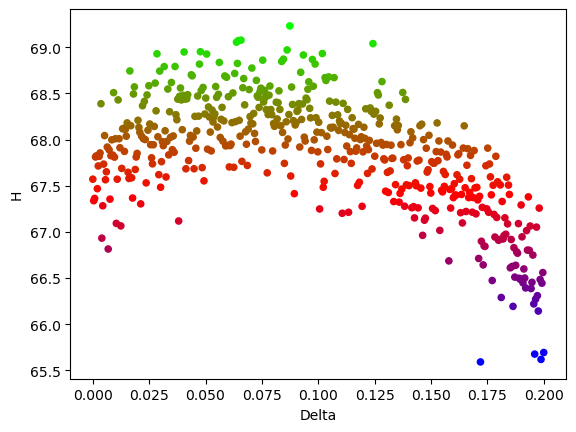

In [395]:

lists_lenght = 500 # Shared value for all lists length for simplicity
max = 0.2 # max delta to use for list

# Function that calculates H for given deltas
def test_deltas(range,max):
    deltas = np.linspace(0 , max, range)
    results = ([None]) * range
    d_list = ([None]) * range

    for j,d in enumerate(deltas):# Loop

        H = ex_ante_delta(d)
        d_list[j] = d # Record delta
        results[j] = [H] # Record H
        
    return d_list , results # Return list of deltas and calculated H

d_list , results = test_deltas(lists_lenght , max) # Run function and store info

# Show results as a scatter:
plt.scatter(d_list , results , s = 20, c = results , cmap = 'brg')
plt.ylabel("H")
plt.xlabel("Delta")
plt.show()





By running the code for many deltas we can make a scatterplot to show the trends, indicating a maximizing point close to 0.075


Also tried to also use scipy, but the optimize function only really wanted to agree with our guess 

In [314]:
# I tried to use optimize 
next_log_kappa = lambda log_kappa , error : (rho * log_kappa) + error
def objective(delta):

    H = ex_ante_delta(delta)
    return -H

guess = iota
bounds = [(0.0 , 0.2)]

best_delta = optimize.minimize(objective , guess , bounds=bounds )
print(best_delta.x[0])

0.010000727580368025



**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



Given that the cost of making a change in labor is $\iota$ , that should be taken into account. 
We try: 
$$
\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left(|\ell_{t-1}-\ell_t^{\ast}+\iota \right|*>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\
$$



In [397]:
# Copies of previous functions, now with iota: 
def ex_post_iota(d): # Function for ex post value
    h = 0 # Initiates or resets value of h
    
    # Values for previous time period:
    log_prev = 0.0 # Log of kappa
    lab_prev = 0.0 # Labor
    
    for t in range(time): # Time-Loop

        err = np.random.normal(loc = err_mean , scale = sigma) # Get random error-deviation

        log_kap_t = next_log_kappa(log_prev , err) # Runs log_kappa equation
        kap_t = next_kappa(log_kap_t) # Finds new kappa from log of kappa
        
        l_diff = (abs(lab_prev - labor_t(kap_t)+iota)) # Finds difference for policy, now with iota included

        if ( l_diff > d): # Check for new policy-condition
            lab_t = labor_t(kap_t) # Sets l
        else:
            lab_t = lab_prev # Sets l equal to previous
        
        if (lab_t == lab_prev)  : # Checks if labor changed and defines cost
            cost = 0 
        else:
            cost = iota 

        h += profit_2(t , kap_t , lab_t , cost) # Sums up the resulting profits

        # Set found variables as previous logs for next cycle
        log_prev = math.log(kap_t) 
        lab_prev = lab_t
        
    return h # Returns the ex post value

def ex_ante_iota(d): # Function for equation of H, ex ante expected value
    sum = 0 # initiates variable for 
    for k in range(K):
        sum += ex_post_iota(d) # sums up all ex post values for given k
    return (sum / K) # Returns H

# Set up parametes
delta = 0.06
tests = 45
tot_diff = 0

for i in range(tests): # Loop which runs code
    Hi = ex_ante_iota(delta) # H-function with iota
    Ho = ex_ante_delta(delta) # Original H-function
    diff = Hi-Ho # Calculate differene
    tot_diff += diff # Sums difference

avg_diff_iota = tot_diff/tests # Calculate average change

print("Adding iota changed the H-value by an average of %f" % avg_diff_iota)


Adding iota changed the H-value by an average of 0.475966


Including $\iota$ seems to have improved H, after running the code many times, the Difference between H-values were always positive for the deltas 

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [ ]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

In [ ]:
#Test global minimum

griewank(np.zeros(2))

0.0

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [ ]:
def global_optm(bounds, tolerance, K_warmup, max_K):
    # 1) Set tolerance and bounds
    tolerance > 0
    bounds = [np.array([-600, -600]), np.array([600, 600])]

    # 2) Set Iterations
    K_warmup > 0
    max_K > K_warmup

    
    fopt = np.inf
    xopt = np.nan

    xs = np.empty((max_K,2))
    fs = np.empty(max_K)
    

    # 3) Loop through k
    for k in range(max_K):

        # A) Draw k uniformly within chosen bounds
        np.random.seed(2023)
        xk = bounds[0] + (bounds[1] - bounds[0]) * np.random.uniform(size=(5000, 2))

        # B) if k < K run optimizer
        if k < K_warmup:
            x_guess = xk[0, :]
            xk_star = optimize.minimize(griewank, x_guess, method='BFGS', tol=tolerance)
            xs[k] = xk_star.x
            fs[k] = xk_star.fun
        else:
            # C) calculate chi
            chi = 0.5 * (2 / (1 + np.exp((k - K_warmup)) / 100))

            # D) set x(0)
            xs_repeat = np.repeat(xs[:k], xk.shape[0] // k, axis=0)
            xk = np.dot(chi, xk) + np.dot((1 - chi), xs_repeat)
            xk[0] = np.squeeze(xk[0])  # set x0 to 1 dimension so that code can run without error

            #Plot figure
            fig = plt.figure()
            ax = fig.add_subplot(1,1,1)
            ax.scatter(xs[:,0],xs[:,1])
            ax.set_xlabel('$x_1$')
            ax.set_ylabel('$x_2$')


            # E) run optimizer
            xk_star = optimize.minimize(griewank, xk[0], method='BFGS', tol=tolerance)
            xs[k] = xk_star.x
            fs[k] = xk_star.fun

            # F) set x_star
            if k == 0 or np.all(griewank(xk_star) < griewank(xs)):
                fopt = fs[k]
                xopt = xs[k]
                

            #G) retrun x* if we are within tolerance
            if np.all(griewank(xs)) < tolerance:
                return xs
            

        # Print the results for each iteration
        print(f'{k + 1:4d}: x0 = ({xk[0][0]:7.2f},{xk[0][1]:7.2f})', end='')
        print(f' -> converged at ({xs[k][0]:7.2f},{xs[k][1]:7.2f}) with f = {fs[k]:12.8f}')

    # best solution
    print(f'\nbest solution:\n x = ({xopt[0]:7.2f},{xopt[1]:7.2f}) -> f = {fopt:12.8f}')

    #Plot figure
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(xs[:,0],xs[:,1])
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')


   1: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   2: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   3: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   4: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   5: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   6: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   7: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   8: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   9: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
  10: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511


KeyError: 0

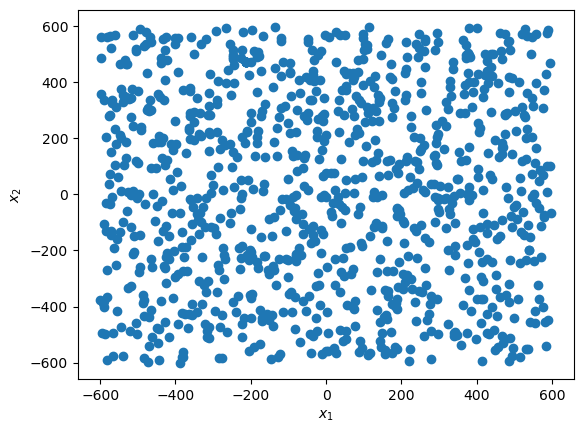

In [ ]:
#settings for optimization
tolerance = 1e-8
K_warmup = 10
max_K = 1000
bounds = [np.array([-600, -600]), np.array([600, 600])]
global_optm(bounds, tolerance, K_warmup, max_K)

Comment: There must be an error in the code, as the values are not converging to 0 but staying at the same value. 
 
The mistake seems to be in line 46) where we set x* in an if condition. The problem is probably that xk_star is not an array and therefor the function griewank() can not be called. 
I tried the following code line as well: 

    if k == 0 or np.all(griewank(xk_star.x) < griewank(xs)):

    
however this would give me a new error: operands could not be broadcast together with shapes (5000,2) (4994,2). With this error a rehsaping of the Arrays would be necessary so that they have the same shape. The problem was intented to by solved by using np.repeat, however it cuold not completely be solved.



For illustration purposes i put the code for plotting before the error in the code happens, (hence before step E). We see that the optimzer convegres to many of the local minimas instead of the global minimum. (In the correct code i would have put the plot code after all the conditions 1-4)

It follows an illustration of the funciton, showing that there are several local minimas:


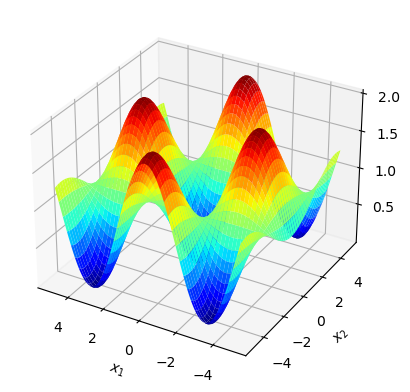

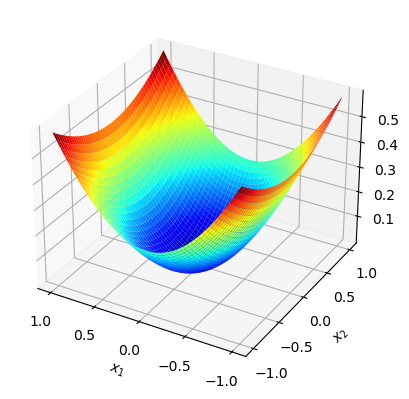

In [ ]:
for bound in [5,1]:
    
    # a. grids
    x1_vec = np.linspace(-bound,bound,1000)
    x2_vec = np.linspace(-bound,bound,1000)
    x1_grid_griewank,x2_grid_griewank = np.meshgrid(x1_vec,x2_vec,indexing='ij')
    griewank_grid = griewank_(x1_grid_griewank,x2_grid_griewank)

    # b. main
    fig = plt.figure(figsize=(10,4))
    
    # 3D
    ax = fig.add_subplot(1,2,1,projection='3d')
    cs = ax.plot_surface(x1_grid_griewank,x2_grid_griewank,griewank_grid,cmap=cm.jet)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.invert_xaxis()
    
    plt.show()

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

As the optimizer function doesnt work properly we cannot demonstaret if the adjustment of warmup iteration will lead to a faster convergence. 
WIth a working function we would simply need to adjust the variable of K_warmup and check how fast the convergence is. 

In [ ]:
#set K_warmup to 100 and run optimizer
K_warmup_new = 100
global_optm(bounds, tolerance, K_warmup_new, max_K)

   1: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   2: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   3: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   4: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   5: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   6: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   7: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   8: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   9: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
  10: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
  11: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
  12: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) wi

KeyError: 0

Here we provide an alternative attempt of solving Q3:

In [ ]:
import numpy as np
from scipy import optimize

# Bounds
x1 = [-600,600]
x2 = [-600,600]
# x1 = np.linspace(-600,600,1201)
# x2 = np.linspace(-600,600,1201)

X_vecs = [[-600,600],[-600,600]]

tau = 10 ** 8
K_ = 10
K = 1000
K_vec = list(range(K))


def draw(bounds):
    return np.random.uniform(bounds)[0]
    # return np.random.choice(bounds) 

x = np.zeros(1000)
hi= np.zeros(1000)
x0= np.zeros(1000)

def function():
    for k in K_vec:
        x[k] = draw(X_vecs)[0]
        if (k >= K_):
            hi[k] = 0.50 * 2 / ( 1 + math.exp(k - K_) / 100)
            x0[k]=x[k]*hi[k] + (1-hi[k])*x_star
        x_star = optimize.minimize(griewank , x0[k] ,  )
        if (k == 0) or (griewank(x_star[k])< griewank(x_star)) :
            x_star = x_star[k]
        if griewank(x_star) < tau:
            return x_star
        
function()

IndexError: index 1 is out of bounds for axis 0 with size 1